# 4.10 IC Coding Etiquette & Excel Reporting

## Table of Contents
1. Import Libraries
2. Import data
3. Task

### 1.0 Import libraries

In [81]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### 2.0 Import data

In [83]:
# Define project folder path
path = r'/Users/sharnti/Desktop/CareerFoundry/Data Immersion/Achievement 4/Instacart Basket Analysis'

In [84]:
# Import custs_ords_prods_combined dataframe
custs_ords_prods_combined = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'custs_ords_prods_combined.pkl'))

In [85]:
# Check dimensions of import
custs_ords_prods_combined.shape

(32404859, 34)

### 3.0 Task

#### Question 2
Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

The new customer data that has been merged into our dataframe includes the following sensitive information:
- First Name
- Last Name

We will drop the __first name__ and __last name__ columns to de-idenfity our analysis.

In [89]:
# Create new anonymised dataframe with first_name, last_name and other unnecessary columns dropped.
anon_custs_ords_prods_combined = custs_ords_prods_combined.drop(columns=['first_name','last_name','_merge'])

In [90]:
# Check output to see if dropping worked
anon_custs_ords_prods_combined.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,spender_flag,median_days_since_prior_order,frequency_flag,gender,state,age,date_joined,num_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


In [91]:
# Double check column names to ensure no sensitive data remains
anon_custs_ords_prods_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 31 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   order_id                       int64  
 1   user_id                        object 
 2   order_number                   int64  
 3   orders_day_of_week             int64  
 4   order_hour_of_day              int64  
 5   days_since_prior_order         float64
 6   first_order                    bool   
 7   product_id                     int64  
 8   add_to_cart_order              int64  
 9   reordered                      int64  
 10  product_name                   object 
 11  aisle_id                       int64  
 12  department_id                  int64  
 13  prices                         float64
 14  price_range_loc                object 
 15  busiest_day                    object 
 16  busiest_days                   object 
 17  busiest_period_of_day          object 
 18  

#### Question 3

The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

- Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).
- Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)


In [93]:
# Create a region column
anon_custs_ords_prods_combined.loc[anon_custs_ords_prods_combined['state'].isin(['Maine','New Hampshire','Vermont','Massachusetts',
                                                                       'Rhode Island','Connecticut','New York',
                                                                       'Pennsylvania','New Jersey']),'region'] = 'Northeast'
anon_custs_ords_prods_combined.loc[anon_custs_ords_prods_combined['state'].isin(['Wisconsin','Michigan','Illinois','Indiana','Ohio',
                                                                       'North Dakota','South Dakota','Nebraska','Kansas','Minnesota',
                                                                       'Iowa','Missouri']),'region'] = 'Midwest'
anon_custs_ords_prods_combined.loc[anon_custs_ords_prods_combined['state'].isin(['Delaware','Maryland','District of Columbia','Virginia',
                                                                       'West Virginia','North Carolina','South Carolina','Georgia',
                                                                       'Florida','Kentucky','Tennessee','Mississippi','Alabama',
                                                                       'Oklahoma','Texas','Arkansas','Louisiana']),'region'] = 'South'
anon_custs_ords_prods_combined.loc[anon_custs_ords_prods_combined['state'].isin(['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona',
                                                                       'New Mexico','Alaska','Washington','Oregon',
                                                                       'California','Hawaii' ]),'region'] = 'West'

In [94]:
# View head of dataframe to see if new 'region' column has been added.
anon_custs_ords_prods_combined.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,median_days_since_prior_order,frequency_flag,gender,state,age,date_joined,num_dependants,fam_status,income,region
0,2539329,1,1,2,8,NaN,True,196,1,0,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South


In [95]:
# Create crosstab to view spending habits by region
crosstab = pd.crosstab(anon_custs_ords_prods_combined['region'], anon_custs_ords_prods_combined['spender_flag'], dropna = False)

In [96]:
# View crosstab
crosstab

spender_flag,High customer,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


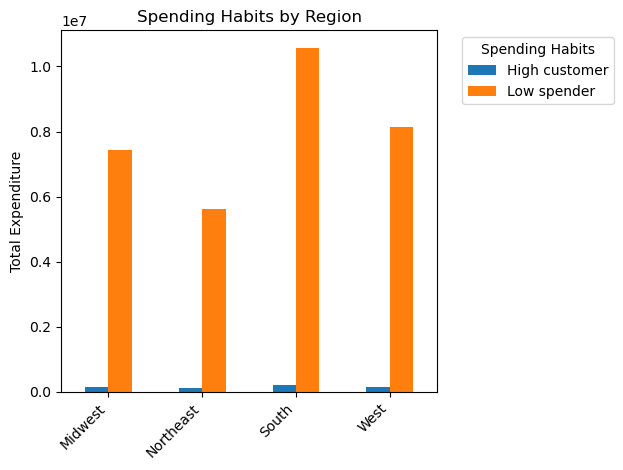

In [97]:
# Create barplot
bar_spender_region = crosstab.plot(kind="bar")

# Add y-axis label
bar_spender_region.set_ylabel('Total Expenditure')  # Replace with an appropriate label

# Hide the x-label
plt.xlabel('')

# Move legend outside of plot
plt.legend(title='Spending Habits', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=10)

# Set title
plt.title('Spending Habits by Region')

# Rotate x-axis labels and adjust layout
bar_spender_region.set_xticklabels(bar_spender_region.get_xticklabels(), rotation=45, ha='right') # Rotate labels
bar_spender_region.figure.tight_layout()  # Ensure elements fit properly

In [98]:
# Export chart to project folder
bar_spender_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_spender_region.png'))

__Observations:__ Whilst the overall _number_ of users in each region differs, their spending habits don't differ drastically. In each region, there are a large number of __low spenders__ and a small number of __high spenders__.

#### Question 4
The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [101]:
# Create a low_activity column for customers with < 5 orders
anon_custs_ords_prods_combined.loc[anon_custs_ords_prods_combined['max_order'] < 5, 'order_activity'] = 'Low Activity'
anon_custs_ords_prods_combined.loc[anon_custs_ords_prods_combined['max_order'] >= 5,'order_activity'] = 'Normal Activity'

In [102]:
#Check head to see if it worked
anon_custs_ords_prods_combined[['max_order','order_activity']].head()

,max_order,order_activity
0,10,Normal Activity
1,10,Normal Activity
2,10,Normal Activity
3,10,Normal Activity
4,10,Normal Activity


In [103]:
# Check count of each flag
anon_custs_ords_prods_combined['order_activity'].value_counts(dropna = False)

order_activity
Normal Activity    30964564
Low Activity        1440295
Name: count, dtype: int64

In [104]:
# Create new dataframe excluding low-activity users
normal_activity_users = anon_custs_ords_prods_combined.loc[anon_custs_ords_prods_combined['order_activity'] == 'Normal Activity']

In [105]:
# Check that noraml_activity_users was created
normal_activity_users.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,frequency_flag,gender,state,age,date_joined,num_dependants,fam_status,income,region,order_activity
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal Activity
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal Activity
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal Activity
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal Activity
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal Activity


In [106]:
# Check count of each flag
normal_activity_users['order_activity'].value_counts(dropna = False)

order_activity
Normal Activity    30964564
Name: count, dtype: int64

In [158]:
# Check dimensions of new dataframe
normal_activity_users.shape

(30964564, 34)

In [107]:
# Export this dataframe
normal_activity_users.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'normal_activity_users.pkl'))

#### Question 5
The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database.

Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

- __To make computational reasons, I'll work with the reduced normal_activity_users dataset. I previously had an error working from the subset, so I'll import the pkl file to see it this works instead._

In [154]:
# Import normal_activity_users dataframe for calculations
df_normal_activity = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'normal_activity_users.pkl'))

In [160]:
# Check dimensions of new dataframe
df_normal_activity.shape

(30964564, 33)

In [162]:
df_normal_activity.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,frequency_flag,gender,state,age,date_joined,num_dependants,fam_status,income,region,order_activity
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal Activity
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal Activity
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal Activity
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal Activity
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal Activity


In [167]:
df_normal_activity['frequency_flag'].value_counts(dropna = False)

frequency_flag
Frequent customer        21204476
Regular customer          6865113
Non-frequent customer     2894975
Name: count, dtype: int64

##### Create Profile Based on Age

In [171]:
# Create a profiling variable based on age
df_normal_activity.loc[(df_normal_activity['age'] < 25), 'age_group'] = 'Young Adult'
df_normal_activity.loc[(df_normal_activity['age'] >= 25) & (df_normal_activity['age'] < 45),'age_group'] = 'Adult'
df_normal_activity.loc[(df_normal_activity['age'] >= 45) & (df_normal_activity['age'] < 65),'age_group'] = 'Middle-Aged'
df_normal_activity.loc[(df_normal_activity['age'] >= 65),'age_group'] = 'Senior'

In [173]:
# Check groups for age_group
df_normal_activity['age_group'].value_counts(dropna = False)

age_group
Middle-Aged    9690051
Adult          9663775
Senior         8195544
Young Adult    3415194
Name: count, dtype: int64

##### Create Profile Based on Income

In [175]:
# Create a profiling variable based on income
df_normal_activity.loc[(df_normal_activity['income'] < 47151), 'income_group'] = 'Low'
df_normal_activity.loc[(df_normal_activity['income'] >= 47151) & (df_normal_activity['income'] < 100526),'income_group'] = 'Low-Middle'
df_normal_activity.loc[(df_normal_activity['income'] >= 100526) & (df_normal_activity['income'] < 191951),'income_group'] = 'Upper-Middle'
df_normal_activity.loc[(df_normal_activity['income'] >= 191951),'income_group'] = 'High'

In [177]:
# Check groups for income_group
df_normal_activity['income_group'].value_counts(dropna = False)

income_group
Low-Middle      14058243
Upper-Middle    13731499
Low              2906878
High              267944
Name: count, dtype: int64

##### Create Profile Based on Parental Status

In [179]:
# Create parent_flag variable
df_normal_activity.loc[(df_normal_activity['num_dependants'] == 0), 'parent_flag'] = 'Not a Parent'
df_normal_activity.loc[(df_normal_activity['num_dependants'] > 0), 'parent_flag'] = 'Parent'

In [181]:
# Check groups for parent_flag
df_normal_activity['parent_flag'].value_counts(dropna = False)

parent_flag
Parent          23224883
Not a Parent     7739681
Name: count, dtype: int64

##### Create Profile Based on Parental Status and Age

In [183]:
# Check groups for fam_status
df_normal_activity['fam_status'].value_counts(dropna = False)

fam_status
married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: count, dtype: int64

In [185]:
# Create parent_age variable
df_normal_activity.loc[(df_normal_activity['num_dependants'] == 0), 'parent_age_group'] = 'Not a Parent'
df_normal_activity.loc[(df_normal_activity['age'] < 25) & (df_normal_activity['num_dependants'] > 0), 'parent_age_group'] = 'Young Parent'
df_normal_activity.loc[(df_normal_activity['age'] >= 25) & (df_normal_activity['age'] < 45) & (df_normal_activity['num_dependants'] > 0), 'parent_age_group'] = 'Adult Parent'
df_normal_activity.loc[(df_normal_activity['age'] >= 45) & (df_normal_activity['age'] < 65) & (df_normal_activity['num_dependants'] > 0), 'parent_age_group'] = 'Middle-Aged Parent'
df_normal_activity.loc[(df_normal_activity['age'] >= 65) & (df_normal_activity['num_dependants'] > 0), 'parent_age_group'] = 'Senior Parent'

In [187]:
# Check groups for parent_age
df_normal_activity['parent_age_group'].value_counts(dropna = False)

parent_age_group
Not a Parent          7739681
Middle-Aged Parent    7238740
Adult Parent          7222873
Senior Parent         6173586
Young Parent          2589684
Name: count, dtype: int64

In [189]:
# Check new columns have been created in dataframe
df_normal_activity.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,date_joined,num_dependants,fam_status,income,region,order_activity,age_group,income_group,parent_flag,parent_age_group
0,2539329,1,1,2,8,NaN,True,196,1,0,...,2/17/2019,3,married,40423,South,Normal Activity,Adult,Low,Parent,Adult Parent
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,2/17/2019,3,married,40423,South,Normal Activity,Adult,Low,Parent,Adult Parent
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,2/17/2019,3,married,40423,South,Normal Activity,Adult,Low,Parent,Adult Parent
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,2/17/2019,3,married,40423,South,Normal Activity,Adult,Low,Parent,Adult Parent
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,2/17/2019,3,married,40423,South,Normal Activity,Adult,Low,Parent,Adult Parent


#### Question 6
Create an appropriate visualization to show the distribution of profiles.

##### Customer Distribution by Age

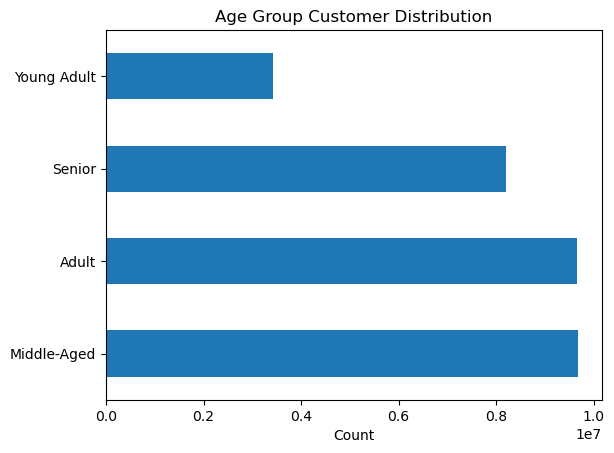

In [383]:
# Create bar plot
bar_age_group = df_normal_activity['age_group'].value_counts().plot.barh()

# setting label of y-axis
plt.ylabel("")
 
# setting label of x-axis
plt.xlabel("Count") 
plt.title("Age Group Customer Distribution")
plt.show()

In [193]:
# Export the bar chart
bar_age_group.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_group.png'))

##### Customer distribution by income group

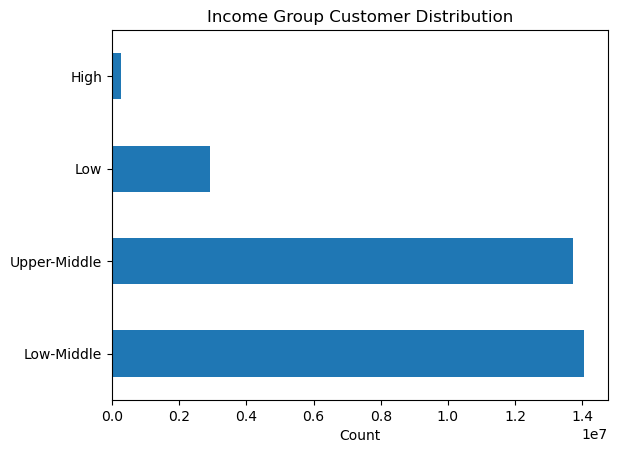

In [425]:
# Create bar plot
bar_income_group = df_normal_activity['income_group'].value_counts().plot.barh()

# setting label of y-axis
plt.ylabel("")
 
# setting label of x-axis
plt.xlabel("Count") 
plt.title("Income Group Customer Distribution")
plt.show()

bar_income_group.figure.tight_layout()  # Ensure elements fit properly

In [427]:
# Export the bar chart
bar_income_group.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_group.png'))

##### Customer distribution by parental status

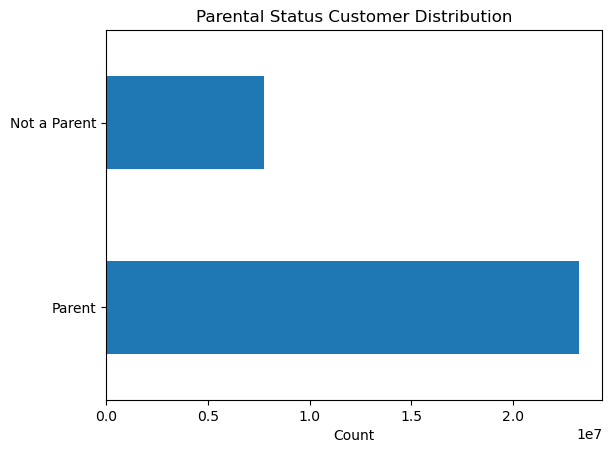

In [421]:
# Create bar plot
bar_parent = df_normal_activity['parent_flag'].value_counts().plot.barh()

# setting label of y-axis
plt.ylabel("")
 
# setting label of x-axis
plt.xlabel("Count") 
plt.title("Parental Status Customer Distribution")
plt.show()

bar_parent.figure.tight_layout()  # Ensure elements fit properly

In [423]:
# Export the bar chart
bar_parent.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_parent.png'))

##### Customer distribution of spending habits by loyalty

In [195]:
# Create crosstab of loyalty and spender flag
crosstab_loyalty_spender_flag = pd.crosstab(df_normal_activity['loyalty_flag'], df_normal_activity['spender_flag'], dropna = False)

In [197]:
crosstab_loyalty_spender_flag

spender_flag,High customer,Low spender
loyalty_flag,,
Loyal customer,216600,10067493
New customer,84011,4719684
Regular customer,302814,15573962


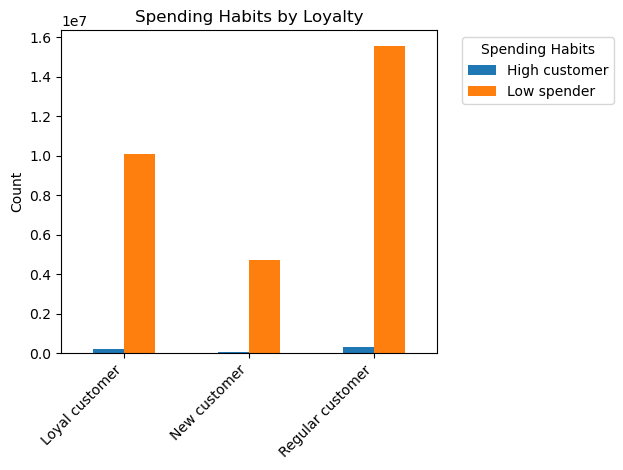

In [199]:
# Create bar plot
bar_loyalty_spender_flag = crosstab_loyalty_spender_flag.plot(kind="bar")

# Add y-axis label
bar_loyalty_spender_flag.set_ylabel('Count')  # Replace with an appropriate label

# Hide the x-label
plt.xlabel('')

# Move legend outside of plot
plt.legend(title='Spending Habits', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=10)

# Set title
plt.title('Spending Habits by Loyalty')

# Rotate x-axis labels and adjust layout
bar_loyalty_spender_flag.set_xticklabels(bar_loyalty_spender_flag.get_xticklabels(), rotation=45, ha='right') # Rotate labels
bar_loyalty_spender_flag.figure.tight_layout()  # Ensure elements fit properly

In [201]:
# Export the bar chart
bar_loyalty_spender_flag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_spender_flag.png'))

##### Customer distribution of order frequency by age group

In [395]:
# Create crosstab of age_group and frequency_flag
crosstab_age_group_frequency_flag = pd.crosstab(df_normal_activity['frequency_flag'], df_normal_activity['age_group'], dropna = False)

In [397]:
crosstab_age_group_frequency_flag

age_group,Adult,Middle-Aged,Senior,Young Adult
frequency_flag,,,,
Frequent customer,6612667,6610186,5630976,2350647
Non-frequent customer,890415,928228,760132,316200
Regular customer,2160693,2151637,1804436,748347


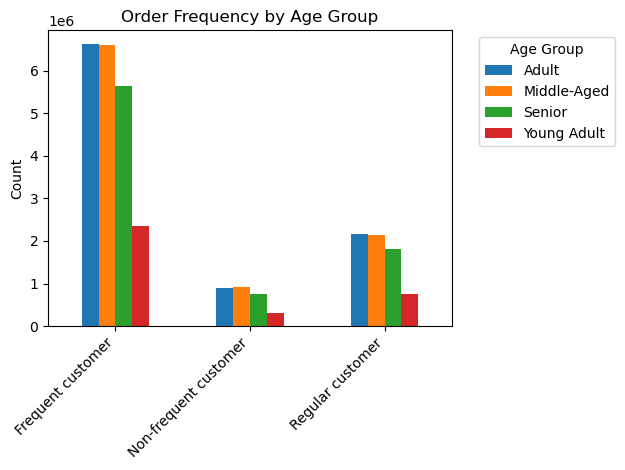

In [401]:
# Create bar plot
bar_age_group_frequency_flag = crosstab_age_group_frequency_flag.plot(kind="bar")

# Add y-axis label
bar_age_group_frequency_flag.set_ylabel('Count')  # Replace with an appropriate label

# Hide the x-label
plt.xlabel('')

# Move legend outside of plot
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=10)

# Set title
plt.title('Order Frequency by Age Group')

# Rotate x-axis labels and adjust layout
bar_age_group_frequency_flag.set_xticklabels(bar_age_group_frequency_flag.get_xticklabels(), rotation=45, ha='right') # Rotate labels
bar_age_group_frequency_flag.figure.tight_layout()  # Ensure elements fit properly

In [403]:
# Export the bar chart
bar_age_group_frequency_flag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_group_frequency_flag.png'))

##### Customer distribution of order frequency by parent_flag

In [406]:
# Create crosstab of parent_flag and frequency_flag
crosstab_parent_flag_frequency_flag = pd.crosstab(df_normal_activity['frequency_flag'], df_normal_activity['parent_flag'], dropna = False)

In [408]:
crosstab_parent_flag_frequency_flag

parent_flag,Not a Parent,Parent
frequency_flag,,
Frequent customer,5285137,15919339
Non-frequent customer,716506,2178469
Regular customer,1738038,5127075


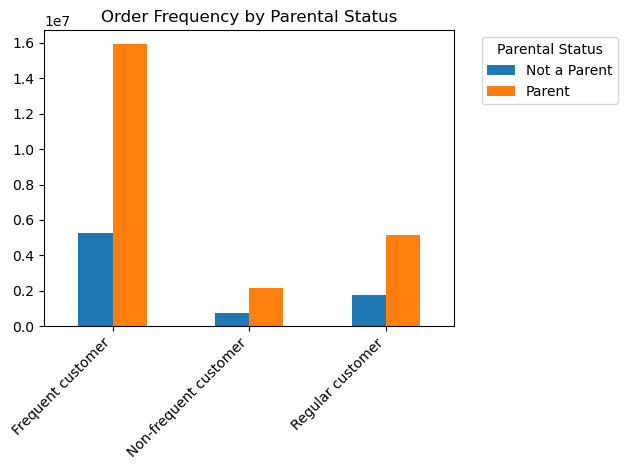

In [412]:
# Create bar plot
bar_parent_flag_frequency_flag = crosstab_parent_flag_frequency_flag.plot(kind="bar")

# Add y-axis label
bar_age_group_frequency_flag.set_ylabel('Count')  # Replace with an appropriate label

# Hide the x-label
plt.xlabel('')

# Move legend outside of plot
plt.legend(title='Parental Status', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=10)

# Set title
plt.title('Order Frequency by Parental Status')

# Rotate x-axis labels and adjust layout
bar_parent_flag_frequency_flag.set_xticklabels(bar_parent_flag_frequency_flag.get_xticklabels(), rotation=45, ha='right') # Rotate labels
bar_parent_flag_frequency_flag.figure.tight_layout()  # Ensure elements fit properly

In [430]:
# Export the bar chart
bar_parent_flag_frequency_flag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_parent_flag_frequency_flag.png'))

##### Order frequency by parent_age 

In [433]:
# Create crosstab of parent_age_group and frequency_flag
crosstab_parent_age_group_frequency_flag = pd.crosstab(df_normal_activity['frequency_flag'], df_normal_activity['parent_age_group'], dropna = False)

In [435]:
crosstab_parent_age_group_frequency_flag

parent_age_group,Adult Parent,Middle-Aged Parent,Not a Parent,Senior Parent,Young Parent
frequency_flag,,,,,
Frequent customer,4952879,4926000,5285137,4240253,1800207
Non-frequent customer,665564,701552,716506,574045,237308
Regular customer,1604430,1611188,1738038,1359288,552169


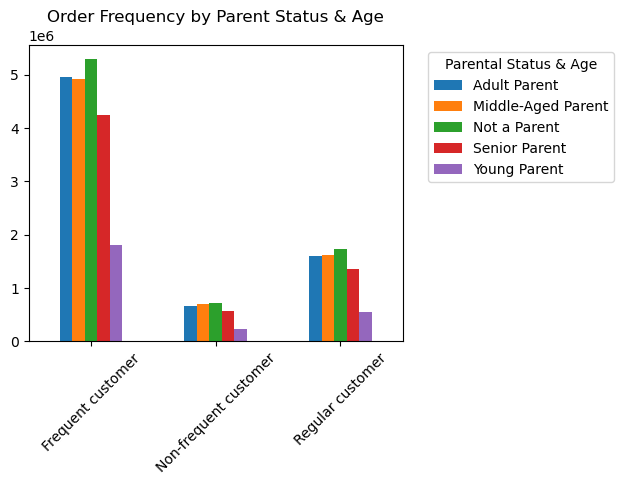

In [457]:
# Create bar plot
bar_parent_age_group_frequency_flag = crosstab_parent_age_group_frequency_flag.plot(kind="bar")

# Add y-axis label
bar_age_group_frequency_flag.set_ylabel('Count')  # Replace with an appropriate label

# Hide the x-label
plt.xlabel('')

# Move legend outside of plot
plt.legend(title='Parental Status & Age', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=10)

# Set title
plt.title('Order Frequency by Parent Status & Age')

# Rotate x-axis labels and adjust layout
bar_parent_age_group_frequency_flag.set_xticklabels(bar_parent_age_group_frequency_flag.get_xticklabels(), rotation=45, ha='center') # Rotate labels
bar_parent_age_group_frequency_flag.figure.tight_layout()  # Ensure elements fit properly

In [459]:
# Export the bar chart
bar_parent_age_group_frequency_flag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_parent_age_group_frequency_flag.png'))

#### Question 7
Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

##### Usage Frequency

In [209]:
# Max, mean and min for usage-frequency (i.e. days between orders) for customer profile 'age_group'
df_normal_activity.groupby('age_group').agg({'days_since_prior_order': ['mean', 'min', 'max']}).round(2)

days_since_prior_order           
                              mean  min   max
age_group                                    
Adult                        10.83  0.0  30.0
Middle-Aged                  10.83  0.0  30.0
Senior                       10.79  0.0  30.0
Young Adult                  10.76  0.0  30.0

In [211]:
# Max, mean and min for usage-frequency (i.e. days between orders) for customer profile 'income_group'
df_normal_activity.groupby('income_group').agg({'days_since_prior_order': ['mean', 'min', 'max']}).round(2)

days_since_prior_order           
                               mean  min   max
income_group                                  
High                          10.07  0.0  30.0
Low                           11.20  0.0  30.0
Low-Middle                    10.78  0.0  30.0
Upper-Middle                  10.78  0.0  30.0

In [213]:
# Max, mean and min for usage-frequency (i.e. days between orders) for customer profile 'parent_age_group'
df_normal_activity.groupby('parent_age_group').agg({'days_since_prior_order': ['mean', 'min', 'max']}).round(2)

days_since_prior_order           
                                     mean  min   max
parent_age_group                                    
Adult Parent                        10.82  0.0  30.0
Middle-Aged Parent                  10.86  0.0  30.0
Not a Parent                        10.79  0.0  30.0
Senior Parent                       10.80  0.0  30.0
Young Parent                        10.71  0.0  30.0

##### Expenditure

In [215]:
# View columns from df_normal_activity
df_normal_activity.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30964564 entries, 0 to 32404858
Data columns (total 37 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   order_id                       int64  
 1   user_id                        object 
 2   order_number                   int64  
 3   orders_day_of_week             int64  
 4   order_hour_of_day              int64  
 5   days_since_prior_order         float64
 6   first_order                    bool   
 7   product_id                     int64  
 8   add_to_cart_order              int64  
 9   reordered                      int64  
 10  product_name                   object 
 11  aisle_id                       int64  
 12  department_id                  int64  
 13  prices                         float64
 14  price_range_loc                object 
 15  busiest_day                    object 
 16  busiest_days                   object 
 17  busiest_period_of_day          object 
 18  max_o

In [217]:
# Create a subset of customer profiles and show the total price of each order
customer_profile = df_normal_activity.groupby(['user_id','income','gender','state','age','num_dependants','fam_status','order_activity','region','age_group','income_group','parent_age_group'])['prices'].sum().reset_index()

In [219]:
# View sample of subset
customer_profile.head()

,user_id,income,gender,state,age,num_dependants,fam_status,order_activity,region,age_group,income_group,parent_age_group,prices
0,1,40423,Female,Alabama,31,3,married,Normal Activity,South,Adult,Low,Adult Parent,375.7
1,10,52716,Male,Florida,34,2,married,Normal Activity,South,Adult,Low-Middle,Adult Parent,1237.1
2,100,138741,Female,West Virginia,64,2,married,Normal Activity,South,Middle-Aged,Upper-Middle,Middle-Aged Parent,266.2
3,1000,63581,Female,Oklahoma,25,1,married,Normal Activity,South,Adult,Low-Middle,Adult Parent,866.0
4,10000,61257,Female,Arkansas,33,0,single,Normal Activity,South,Adult,Low-Middle,Not a Parent,8785.6


In [221]:
# Aggregate variables for customer profiles for total expenditure
customer_profile.groupby('user_id').agg({'prices': ['max', 'min', 'mean']})

prices                
            max     min    mean
user_id                        
1         375.7   375.7   375.7
10       1237.1  1237.1  1237.1
100       266.2   266.2   266.2
1000      866.0   866.0   866.0
10000    8785.6  8785.6  8785.6
...         ...     ...     ...
99994    1394.8  1394.8  1394.8
99995     397.9   397.9   397.9
99996     948.6   948.6   948.6
99998     190.1   190.1   190.1
99999    2398.4  2398.4  2398.4

[162631 rows x 3 columns]

In [223]:
# Max, mean and min for total expenditure (i.e. prices) for age_group
customer_profile.groupby('age_group').agg({'prices': ['mean', 'min', 'max']}).round(2)

prices               
                mean   min      max
age_group                          
Adult        1486.31   7.0  22696.9
Middle-Aged  1479.89   5.0  24307.1
Senior       1477.19   6.8  26394.9
Young Adult  1497.36  10.5  18436.9

In [225]:
# Max, mean and min for total expenditure (i.e. prices) for income_group
customer_profile.groupby('income_group').agg({'prices': ['mean', 'min', 'max']}).round(2)

prices               
                 mean   min      max
income_group                        
High          2163.67  74.3  15322.9
Low            880.60   5.0  24307.1
Low-Middle    1543.79  11.1  22696.9
Upper-Middle  1604.37  24.7  26394.9

In [227]:
# Max, mean and min for expenditure (i.e. prices) for parent_age_group
customer_profile.groupby('parent_age_group').agg({'prices': ['mean', 'min', 'max']}).round(2)

prices               
                       mean   min      max
parent_age_group                          
Adult Parent        1489.32   7.0  22696.9
Middle-Aged Parent  1472.83  10.4  21509.2
Not a Parent        1480.09   5.0  24307.1
Senior Parent       1478.35   6.8  26394.9
Young Parent        1515.52  12.0  18436.9

#### Question 8
Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.
- _I'll need to merge my existing dataframe with the departments dataframe_

##### Merge with departments dataframe

In [229]:
# Import departments dataframe
dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [231]:
dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [233]:
# Check data types of dept for merge
dept.dtypes

department_id     int64
department       object
dtype: object

In [235]:
# Check data types of df_normal_activity for merge
df_normal_activity.dtypes

order_id                           int64
user_id                           object
order_number                       int64
orders_day_of_week                 int64
order_hour_of_day                  int64
days_since_prior_order           float64
first_order                         bool
product_id                         int64
add_to_cart_order                  int64
reordered                          int64
product_name                      object
aisle_id                           int64
department_id                      int64
prices                           float64
price_range_loc                   object
busiest_day                       object
busiest_days                      object
busiest_period_of_day             object
max_order                          int64
loyalty_flag                      object
avg_price                        float64
spender_flag                      object
median_days_since_prior_order    float64
frequency_flag                    object
gender          

In [237]:
# Convert department_id from dept to string
df_normal_activity['department_id'] = df_normal_activity['department_id'].astype('str')

In [238]:
# Check data types of df_normal_activity for merge
df_normal_activity[['department_id']].dtypes

department_id    object
dtype: object

In [241]:
# Convert department_id from dept to string
dept['department_id'] = dept['department_id'].astype('str')

In [243]:
# Check data types of dept for merge
dept.dtypes

department_id    object
department       object
dtype: object

In [245]:
# Check shape of df_normal_activity before merge
df_normal_activity.shape

(30964564, 37)

In [247]:
# Merge dept with df_normal_activity
anon_custs_ords_prods_depts_combined = df_normal_activity.merge(dept, on='department_id', indicator= True)

In [248]:
# Check sample of new dataframe
anon_custs_ords_prods_depts_combined.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,fam_status,income,region,order_activity,age_group,income_group,parent_flag,parent_age_group,department,_merge
0,2539329,1,1,2,8,NaN,True,196,1,0,...,married,40423,South,Normal Activity,Adult,Low,Parent,Adult Parent,beverages,both
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,married,40423,South,Normal Activity,Adult,Low,Parent,Adult Parent,dairy eggs,both
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,married,40423,South,Normal Activity,Adult,Low,Parent,Adult Parent,snacks,both
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,married,40423,South,Normal Activity,Adult,Low,Parent,Adult Parent,snacks,both
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,married,40423,South,Normal Activity,Adult,Low,Parent,Adult Parent,household,both


In [174]:
# Check shape of new dataframe
anon_custs_ords_prods_depts_combined.shape

(32404859, 38)

In [176]:
# Check for a full match
anon_custs_ords_prods_depts_combined['_merge'].value_counts()

_merge
both          32404859
left_only            0
right_only           0
Name: count, dtype: int64

In [178]:
# Drop the '_merge' column as we no longer require it
anon_custs_ords_prods_depts_combined = anon_custs_ords_prods_depts_combined.drop(columns=['_merge'])

In [249]:
# Check that '_merge' column has been dropped
anon_custs_ords_prods_depts_combined.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,fam_status,income,region,order_activity,age_group,income_group,parent_flag,parent_age_group,department,_merge
0,2539329,1,1,2,8,NaN,True,196,1,0,...,married,40423,South,Normal Activity,Adult,Low,Parent,Adult Parent,beverages,both
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,married,40423,South,Normal Activity,Adult,Low,Parent,Adult Parent,dairy eggs,both
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,married,40423,South,Normal Activity,Adult,Low,Parent,Adult Parent,snacks,both
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,married,40423,South,Normal Activity,Adult,Low,Parent,Adult Parent,snacks,both
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,married,40423,South,Normal Activity,Adult,Low,Parent,Adult Parent,household,both


##### Compare regions and departments

In [462]:
# Create crosstab to department by region
crosstab_departments_region = pd.crosstab(anon_custs_ords_prods_depts_combined['region'], anon_custs_ords_prods_depts_combined['department'], dropna = False)

In [463]:
# View crosstab of region and departments
crosstab_departments_region

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
region,,,,,,,,,,,,,,,,,,,,,
Midwest,34043,95741,261753,598979,156155,7929,237459,1212490,234464,193463,...,166992,60666,158260,15563,7983,420334,100398,21358,2134115,645143
Northeast,25017,72712,199300,462929,117904,5599,176936,914616,178398,143817,...,124604,44678,118571,11512,6268,312731,74765,17734,1593004,493154
South,48813,139511,371620,859419,223172,11180,337458,1723016,333620,272813,...,230061,84649,224120,21787,11579,591754,142496,29909,3027476,916780
West,36754,102428,288155,650574,173619,8743,260221,1327060,257352,212043,...,178200,65998,173830,15906,8581,457886,106647,24059,2324678,711329


##### Compare age group with department

In [468]:
# Create crosstab to view spending habits (i.e. product preference) by age_group
crosstab_departments_age_group = pd.crosstab(anon_custs_ords_prods_depts_combined['department'], anon_custs_ords_prods_depts_combined['age_group'], dropna = False)

In [469]:
# View crosstab age_group and departments
crosstab_departments_age_group

age_group,Adult,Middle-Aged,Senior,Young Adult
department,,,,
alcohol,43878,46579,36693,17477
babies,128453,129910,106204,45825
bakery,350445,350804,295997,123582
beverages,793938,814687,684020,279256
breakfast,208832,211274,175296,75448
bulk,10441,10298,8945,3767
canned goods,317197,315774,267509,111594
dairy eggs,1623468,1612490,1368072,573152
deli,314553,314110,265199,109972


##### Compare parent status with departments

In [473]:
# Create crosstab to view deparments by parent_flag
crosstab_parent_flag_department = pd.crosstab(anon_custs_ords_prods_depts_combined['department'], anon_custs_ords_prods_depts_combined['parent_flag'], dropna = False)

In [474]:
crosstab_parent_flag_department

parent_flag,Not a Parent,Parent
department,,
alcohol,36827,107800
babies,103328,307064
bakery,281395,839433
beverages,645341,1926560
breakfast,166432,504418
bulk,8000,25451
canned goods,251020,761054
dairy eggs,1294376,3882806
deli,253382,750452


In [487]:
# Create crosstab to view frequency by income_group
crosstab_frequency_income_group = pd.crosstab(anon_custs_ords_prods_depts_combined['frequency_flag'], anon_custs_ords_prods_depts_combined['income_group'], dropna = False)

In [489]:
crosstab_frequency_income_group

income_group,High,Low,Low-Middle,Upper-Middle
frequency_flag,,,,
Frequent customer,194647,1895597,9670670,9443562
Non-frequent customer,16953,330796,1292445,1254781
Regular customer,56344,680485,3095128,3033156


#### Question 9
Produce suitable charts to illustrate your results and export them in your project folder.

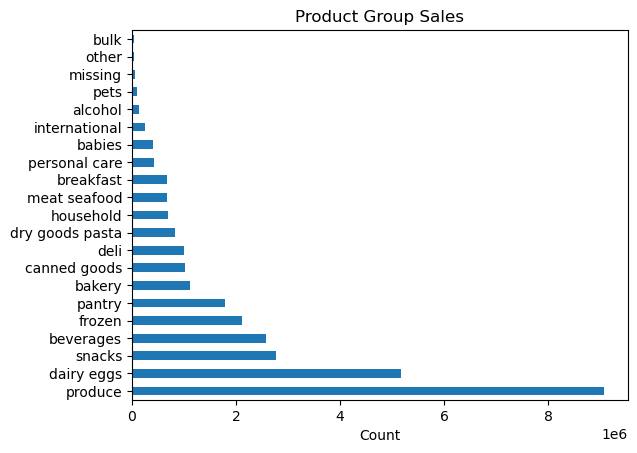

In [270]:
# Create bar chart based on sales by department
bar_department = anon_custs_ords_prods_depts_combined['department'].value_counts().plot.barh()

# setting label of y-axis
plt.ylabel("")
 
# setting label of x-axis
plt.xlabel("Count") 
plt.title("Product Group Sales")
plt.show()
bar_department.figure.tight_layout()  # Ensure elements fit properly

In [272]:
# Export bar chart
bar_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_department.png'))

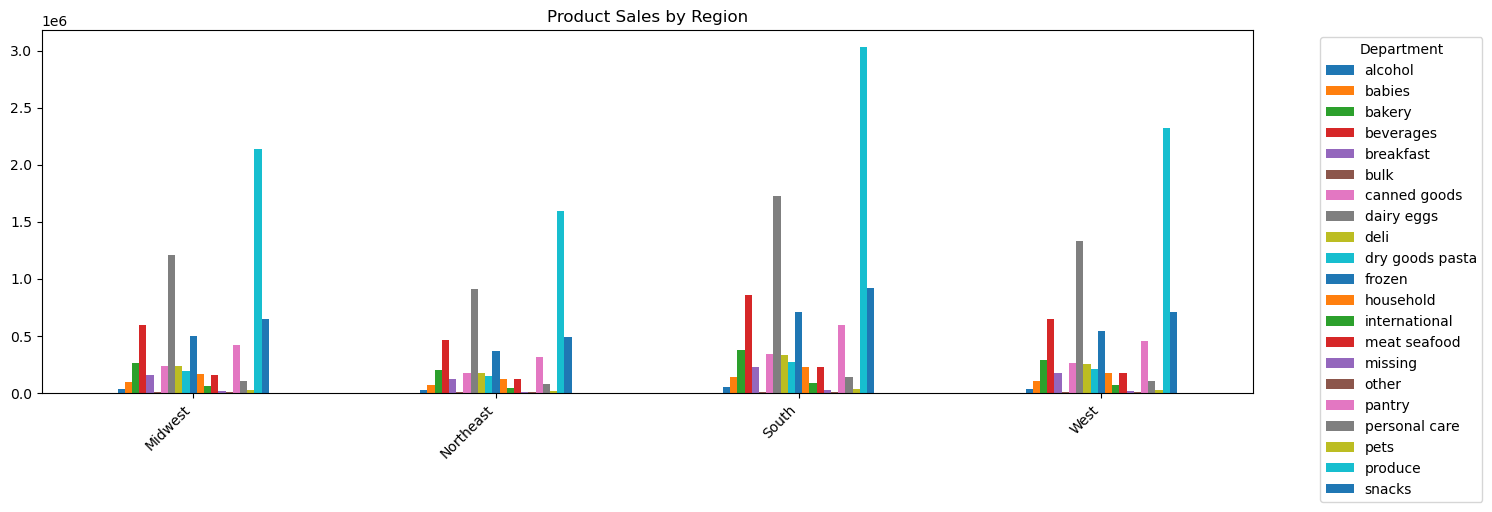

In [483]:
# Bar Chart
bar_crosstab_departments_region = crosstab_departments_region.plot(kind = 'bar', figsize=(15,5))
plt.title('Product Sales by Region')
plt.xlabel('')
plt.ylabel('')

# Move legend outside of plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=10)
# Rotate x-axis labels and adjust layout
bar_crosstab_departments_region.set_xticklabels(bar_crosstab_departments_region.get_xticklabels(), rotation=45, ha='right') # Rotate labels
bar_crosstab_departments_region.figure.tight_layout()  # Ensure elements fit properly

In [485]:
# Export bar chart
bar_crosstab_departments_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_crosstab_departments_region.png'))

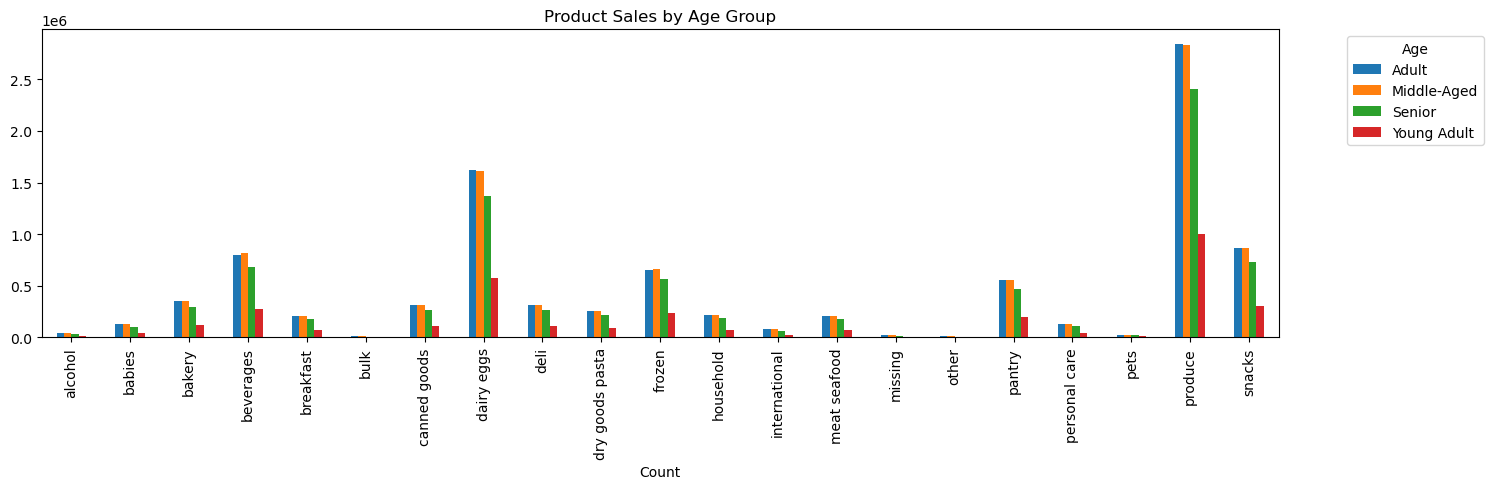

In [479]:
# Bar Chart
bar_crosstab_departments_age_group = crosstab_departments_age_group.plot(kind = 'bar', figsize=(15,5))
plt.title('Product Sales by Age Group')
plt.xlabel('Count')
plt.ylabel('')

# Move legend outside of plot
plt.legend(title='Age', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=10)
bar_crosstab_departments_age_group.figure.tight_layout()  # Ensure elements fit properly

In [481]:
# Export bar chart
bar_crosstab_departments_age_group.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_crosstab_departments_age_group.png'))

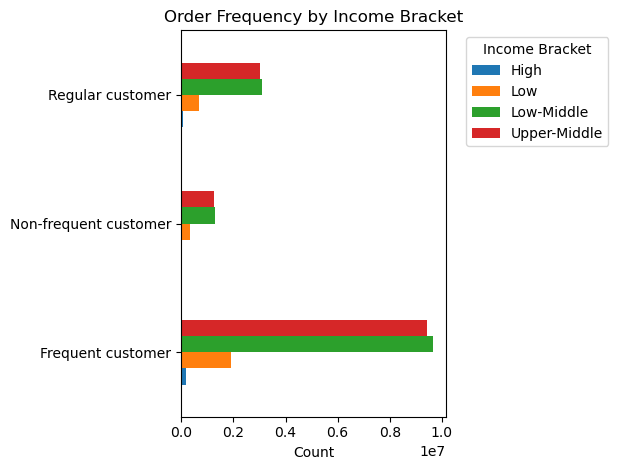

In [497]:
# Bar Chart
bar_crosstab_frequency_income_group = crosstab_frequency_income_group.plot(kind = 'barh')
plt.title('Order Frequency by Income Bracket')
plt.xlabel('Count')
plt.ylabel('')

# Move legend outside of plot
plt.legend(title='Income Bracket', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=10)
bar_crosstab_frequency_income_group.figure.tight_layout()  # Ensure elements fit properly

In [499]:
# Export bar chart
bar_crosstab_frequency_income_group.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_crosstab_frequency_income_group.png'))

#### Question 10
Tidy up your script, export your final data set, and save your notebook.

In [501]:
# Export data to pkl
anon_custs_ords_prods_depts_combined.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'anon_custs_ords_prods_depts_combined.pkl'))